# ECE 285 MLIP Assignment 2 - CNNs and PyTorch

## Arik Horodniceanu A53285765

## 3 Getting started

In [1]:
import numpy as np
import torch

## 4 Tensors

### 1

In [2]:
x = torch.Tensor(5,3)
print(x)
print(x.type())

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.4517e-42, 0.0000e+00],
        [0.0000e+00, 9.9184e-39, 0.0000e+00]])
torch.FloatTensor


x is initialized as a zero tensor of floating point values.

### 2

In [3]:
y = torch.rand(5,3)
print(y)
print(y.type())
y = torch.randn(5,3)
print(y)
print(y.type())

tensor([[0.3703, 0.1867, 0.1076],
        [0.4567, 0.6128, 0.9207],
        [0.6963, 0.7389, 0.1949],
        [0.5142, 0.3140, 0.2071],
        [0.2204, 0.4856, 0.8149]])
torch.FloatTensor
tensor([[-1.4256, -0.0723, -0.6979],
        [ 2.0232, -0.1713, -1.1022],
        [-0.3693,  0.1674, -0.3972],
        [ 0.4700, -1.4627,  0.3014],
        [-1.4162, -0.4298,  0.3880]])
torch.FloatTensor


torch.rand() returns a tensor of values sampled from a uniform distribution [0,1). torch.randn() returns a tensor of values sampled from a standard normal distribution, ie gaussian with mean 0 and variance 1. Both are tensors of floating point values.

### 3

In [4]:
x = x.double()
y = y.double()
print(x)
print(y)
print(x.type())
print(y.type())

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.4517e-42, 0.0000e+00],
        [0.0000e+00, 9.9184e-39, 0.0000e+00]], dtype=torch.float64)
tensor([[-1.4256, -0.0723, -0.6979],
        [ 2.0232, -0.1713, -1.1022],
        [-0.3693,  0.1674, -0.3972],
        [ 0.4700, -1.4627,  0.3014],
        [-1.4162, -0.4298,  0.3880]], dtype=torch.float64)
torch.DoubleTensor
torch.DoubleTensor


The type displayed is torch.float64, ie double precision tensors.

### 4

In [5]:
x = torch.Tensor([[-0.1859, 1.3970, 0.5236],
                [ 2.3854, 0.0707, 2.1970],
                [-0.3587, 1.2359, 1.8951],
                [-0.1189, -0.1376, 0.4647],
                [-1.8968, 2.0164, 0.1092]])
y = torch.Tensor([[ 0.4838, 0.5822, 0.2755],
                [ 1.0982, 0.4932, -0.6680],
                [ 0.7915, 0.6580, -0.5819],
                [ 0.3825, -1.1822, 1.5217],
                [ 0.6042, -0.2280, 1.3210]])
print(x.shape)
print(y.shape)

torch.Size([5, 3])
torch.Size([5, 3])


Both are tensors of size 5x3.

### 5

In [6]:
z = torch.stack((x,y))
print(z.shape)

torch.Size([2, 5, 3])


In [7]:
z1 = torch.cat((x,y),0)
z2 = torch.cat((x,y),1)
print(z1.shape)
print(z2.shape)

torch.Size([10, 3])
torch.Size([5, 6])


The shape of z is 2x5x3. torch.cat concatenates both tensors into a 2D tensor, just along different axes (rows or columns). The result is still a 2D tensor, as opposed to torch.stack() which creates a 3D tensor.

### 6

In [8]:
print(y[4,2])
print(z[1,4,2])

tensor(1.3210)
tensor(1.3210)


The value is 1.321.

### 7

In [9]:
print(z[:,4,2])

tensor([0.1092, 1.3210])


There are 2 elements, one corresponding to each of the stacked tensors x,y.

### 8

In [10]:
print(x + y)
print(torch.add(x, y))
print(x.add(y))
torch.add(x, y, out=x)
print(x)

tensor([[ 0.2979,  1.9792,  0.7991],
        [ 3.4836,  0.5639,  1.5290],
        [ 0.4328,  1.8939,  1.3132],
        [ 0.2636, -1.3198,  1.9864],
        [-1.2926,  1.7884,  1.4302]])
tensor([[ 0.2979,  1.9792,  0.7991],
        [ 3.4836,  0.5639,  1.5290],
        [ 0.4328,  1.8939,  1.3132],
        [ 0.2636, -1.3198,  1.9864],
        [-1.2926,  1.7884,  1.4302]])
tensor([[ 0.2979,  1.9792,  0.7991],
        [ 3.4836,  0.5639,  1.5290],
        [ 0.4328,  1.8939,  1.3132],
        [ 0.2636, -1.3198,  1.9864],
        [-1.2926,  1.7884,  1.4302]])
tensor([[ 0.2979,  1.9792,  0.7991],
        [ 3.4836,  0.5639,  1.5290],
        [ 0.4328,  1.8939,  1.3132],
        [ 0.2636, -1.3198,  1.9864],
        [-1.2926,  1.7884,  1.4302]])


All print the same output, they are equivalent.

### 9

In [11]:
x = torch.randn(4,4)
y = x.view(16)
z = x.view(-1,8)
print(x.size(),y.size(),z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


The 1st command creates a 4x4 tensor of values from a standard normal distribution, the 2nd reshapes it into a 1d array of length 16 and the 3rd reshapes it into a 2x8 tensor.

### 10

In [12]:
x = torch.rand(10,10)
y = torch.rand(2,100)
x = x.view(1,100)
y = y.view(100,2)
print(torch.mm(x,y))

tensor([[22.7134, 23.4689]])


(1x100)(100x2) = 1x2

## 5 NumPy and PyTorch

### 11

In [13]:
a = torch.ones(5)
print(a)
b = a.numpy()
print(b)
print(a.type(),type(b),b.dtype)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
torch.FloatTensor <class 'numpy.ndarray'> float32


a is a tensor of floating point numbers, b is an ndarray (Numpy array) of floating point numbers.

### 12

In [14]:
a[0] +=1
print(a)
print(b)

tensor([2., 1., 1., 1., 1.])
[2. 1. 1. 1. 1.]


Yes, they match. b points to the same memory location as a, so its value has also changed.

### 13

In [15]:
a.add_(1)
print(a,b)
a[:] +=1
print(a,b)
a = a.add(1)
print(a,b)

tensor([3., 2., 2., 2., 2.]) [3. 2. 2. 2. 2.]
tensor([4., 3., 3., 3., 3.]) [4. 3. 3. 3. 3.]
tensor([5., 4., 4., 4., 4.]) [4. 3. 3. 3. 3.]


All these operations are equivalent, adding 1 to each element in a. However, for the last operation since there is an assignment to a (a=...), the value of b does not change since the memory pointed to has changed.

### 14

In [16]:
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a,1,out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


Same thing as before, a is a numpy ndarray, b is a tensor of floating point numbers and since they reference the same area in memory their values remain the same when adding 1 to a.

### 15

In [17]:
import time
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
t1 = time.time()
x = torch.randn(5, 3).to(device)
t2 = time.time()
print(str(t2-t1))

t1 = time.time()
y = torch.randn(5, 3, device=device)
t2 = time.time()
print(str(t2-t1))
z = x + y

cuda
7.175905704498291
0.03749561309814453


The second command is much faster (~2 orders of magnitude) since the tensor is created on GPU directly rather than creating it on CPU and transfering to GPU which is slow.

In [18]:
print(x,y,z)

tensor([[ 0.1938,  0.9088,  0.4392],
        [-0.8614, -1.2590,  0.1905],
        [ 0.2335,  1.0373,  0.5423],
        [-0.7413, -1.8596,  1.8363],
        [ 0.1444, -0.1994,  1.7531]], device='cuda:0') tensor([[-1.3939,  0.8653,  0.2188],
        [ 0.7309,  0.8124, -1.3547],
        [-1.4945,  1.1921, -0.0900],
        [-0.9002, -0.0709, -0.6154],
        [ 0.7127, -0.7959, -0.8818]], device='cuda:0') tensor([[-1.2000,  1.7741,  0.6580],
        [-0.1305, -0.4465, -1.1642],
        [-1.2610,  2.2294,  0.4523],
        [-1.6415, -1.9306,  1.2209],
        [ 0.8572, -0.9953,  0.8713]], device='cuda:0')


The first command checks if there's a GPU unit available. Next it moves a random 5x3 tensor to GPU (x), creates one at GPU (y) and then adds them together. The 2nd command is faster, as moving tensors created on CPU to GPU is much slower than just creating them on GPU.

### 16

In [19]:
print(z.cpu().numpy())
print(z.numpy())

[[-1.200048    1.7740563   0.6579717 ]
 [-0.13049299 -0.44654912 -1.1641661 ]
 [-1.2610004   2.2294064   0.45232165]
 [-1.6414716  -1.9305704   1.2209041 ]
 [ 0.85715485 -0.9952726   0.8712884 ]]


TypeError: can't convert CUDA tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

First one can move to numpy array on CPU. Second instruction is not valid, need to move it to CPU first.

## 6 Autograd: Automatic Differentiation

### 17

In [20]:
x = torch.ones(2,2,requires_grad=True)
print(x)
y = x+2
print(y)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [21]:
print (y.requires_grad)
print (x.grad,y.grad)

True
None None


### 18

In [22]:
z = y*y*3
f = z.mean()
print(z,f)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward1>)


$$\textbf{x} = (x_1,x_2,x_3,x_4) \\ \textbf{y} = (x_1+2, x_2+2, x_3+2, x_4+2) \\ \textbf{z} = (3(x_1+2)^2,3(x_2+2)^2,3(x_3+2)^2,3(x_4+2)^2)$$
$$f = \frac{1}{4}\sum_{i=1}^4{z_i} = \frac{3}{4}\sum_{i=1}^4{(x_i+2)^2}$$

### 19

In [23]:
f.backward()
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


$$\nabla_xf(\textbf{x}))_i=4.5$$

### 20

$$\nabla_xf(\textbf{x}))_i=2*\frac{3}{4}(x_i+2)=[x_i = 1]=4.5$$
Theoretically sound result, correct answer.

## 7 MNIST Data preparation

### 21

In [24]:
import MNISTtools
xtrain, ltrain = MNISTtools.load(dataset='training')
xtest, ltest = MNISTtools.load(dataset='testing')

# Same function as assignment 1
def normalize_MNIST_images(x):
    normalized=x.astype(np.float32)
    normalized-=127.5
    normalized/=127.5
    return normalized


xtrain = normalize_MNIST_images(xtrain)
xtest = normalize_MNIST_images(xtest)

### 22

In [25]:
xtrain = np.reshape(xtrain,(28,28,1,60000))
xtest = np.reshape(xtest,(28,28,1,10000))
xtrain = np.moveaxis(xtrain,[1, 0, 2, 3], [3, 2, 1,0])
xtest = np.moveaxis(xtest,[1, 0, 2, 3], [3, 2, 1,0])
print(xtrain.shape,xtest.shape)

(60000, 1, 28, 28) (10000, 1, 28, 28)


Correct, according to batch size $\times$ num of input channels $\times$ height $\times$ width.

### 23

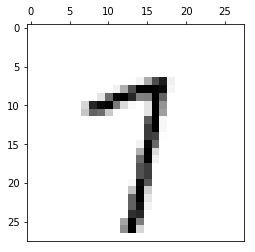

In [27]:
import matplotlib as pyplot
MNISTtools.show(xtrain[42,0,:,:])


Our old friend, number 7.

### 24

In [28]:
xtrain = torch.from_numpy(xtrain)
ltrain = torch.from_numpy(ltrain)
xtest = torch.from_numpy(xtest)
ltest = torch.from_numpy(ltest)

## 8 Convolutional Neural Network (CNN) for MNIST classification

### 25

After convolution 1: 6x24x24 (28-5+1 = 24)

After pool 1: 6x12x12 (24/2 = 12)

After convolution 2: 16x8x8 (12-5+1 = 8)

After pool 2: 16x4x4 (8/2 = 4)

The first number refers to how many, the other 2 refer to the dimensions.

The third layer, which is a FC layer has 16x4x4 = 256 input units from the 2nd pool layer.

### 26

In [29]:
import torch.nn as nn
import torch.nn.functional as F
# This is our neural networks class that inherits from nn.Module
class LeNet(nn.Module):
# Here we define our network structure
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(256,120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    # Here we define one forward pass through the network
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2,2))
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    # Determine the number of features in a batch of tensors
    def num_flat_features(self, x ):
        size = x.size()[1:]
        return np.prod(size)
    
net = LeNet()
print(net)


LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


This function just defines the layers in the network according to the definition. The auxillary function flattens the features to 1d for the inputs.

### 27

In [30]:
for name, param in net.named_parameters():
    print(name, param.size(), param.requires_grad)

conv1.weight torch.Size([6, 1, 5, 5]) True
conv1.bias torch.Size([6]) True
conv2.weight torch.Size([16, 6, 5, 5]) True
conv2.bias torch.Size([16]) True
fc1.weight torch.Size([120, 256]) True
fc1.bias torch.Size([120]) True
fc2.weight torch.Size([84, 120]) True
fc2.bias torch.Size([84]) True
fc3.weight torch.Size([10, 84]) True
fc3.bias torch.Size([10]) True


The parameters of the convolutional layers are according to batch size  ×  num of input channels  × height  × width , like section 22. 

The parameters for the FC layers are just the number of inputs and outputs, like section 25. The bias can be thought of as an extra dimension, so it's always going to be 1x[same dimension as its accompanying layer]. 

All gradients are going to be tracked by autograd, since .requires_grad is True for all.

### 28

In [31]:
with torch.no_grad():
    yinit = net(xtest)
    
_, lpred = yinit.max(1)
print(100 * (ltest == lpred.int()).float().mean())
#print(100*(ltest==lpred).float().mean())

tensor(10.2900)


This initializes the network and checks the accuracy of classification on the test set. Does that by comparing the predicted labels to test labels. Accuracy is 10.29% without backprop after first pass only. Note there was a bug for me with the code given, so I made a slight modification. This has no effect on the results.

### 29

See full function next section.

### 30

In [32]:
def backprop_deep(xtrain, ltrain, net, T, B=100, gamma=.001, rho=.9):
    N = xtrain.size()[0] # Training set size
    NB = int((N+B-1)/B) # Number of minibatches
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(net.parameters(), lr=gamma, momentum=rho)
    for epoch in range(T):
        running_loss = 0.0
        shuffled_indices = np.random.permutation(range(N))
        for k in range(NB):
            t = shuffled_indices[k]
            # Extract k-th minibatch from xtrain and ltrain
            minibatch_indices = shuffled_indices[B*k:min(B*(k+1), N)]
            inputs = xtrain[minibatch_indices]
            labels = ltrain[minibatch_indices]
            # Initialize the gradients to zero
            optimizer.zero_grad()
            # Forward propagation
            outputs = net(inputs)
            # Error evaluation
            loss = criterion(outputs, labels.long())
            # Back propagation
            loss.backward()
            # Parameter update
            optimizer.step()
            # Print averaged loss per minibatch every 100 mini-batches
            # Compute and print statistics
            with torch.no_grad():
                running_loss += loss.item()
            if k % 100 == 99:
                print('[%d, %5d] loss: %.3f' %(epoch+1,k+1,running_loss/100))
                running_loss = 0.0
    
net = LeNet()
backprop_deep(xtrain, ltrain, net, T=3)


[1,   100] loss: 2.294
[1,   200] loss: 2.279
[1,   300] loss: 2.250
[1,   400] loss: 2.168
[1,   500] loss: 1.801
[1,   600] loss: 1.036
[2,   100] loss: 0.714
[2,   200] loss: 0.574
[2,   300] loss: 0.495
[2,   400] loss: 0.447
[2,   500] loss: 0.393
[2,   600] loss: 0.365
[3,   100] loss: 0.329
[3,   200] loss: 0.315
[3,   300] loss: 0.284
[3,   400] loss: 0.273
[3,   500] loss: 0.254
[3,   600] loss: 0.243


Pretty similar results to what was expected, loss decreases considerably with backprop, indicating test results will also improve.

### 31

In [33]:
with torch.no_grad():
    yinit = net(xtest)
    
_, lpred = yinit.max(1)
print(100 * (ltest == lpred.int()).float().mean())

tensor(93.2300)


93.23% accuracy compared to ~12.8% before. Backprop does make the network learn, clearly.

### 32

In [34]:
device='cuda'
net = LeNet().to(device)
xtrain=xtrain.to(device)
ltrain=ltrain.to(device)

In [35]:
backprop_deep(xtrain, ltrain, net, T=10)

[1,   100] loss: 2.300
[1,   200] loss: 2.293
[1,   300] loss: 2.285
[1,   400] loss: 2.272
[1,   500] loss: 2.248
[1,   600] loss: 2.186
[2,   100] loss: 1.975
[2,   200] loss: 1.397
[2,   300] loss: 0.798
[2,   400] loss: 0.565
[2,   500] loss: 0.452
[2,   600] loss: 0.393
[3,   100] loss: 0.353
[3,   200] loss: 0.313
[3,   300] loss: 0.284
[3,   400] loss: 0.246
[3,   500] loss: 0.237
[3,   600] loss: 0.210
[4,   100] loss: 0.188
[4,   200] loss: 0.201
[4,   300] loss: 0.181
[4,   400] loss: 0.181
[4,   500] loss: 0.169
[4,   600] loss: 0.159
[5,   100] loss: 0.154
[5,   200] loss: 0.142
[5,   300] loss: 0.140
[5,   400] loss: 0.133
[5,   500] loss: 0.149
[5,   600] loss: 0.129
[6,   100] loss: 0.121
[6,   200] loss: 0.120
[6,   300] loss: 0.129
[6,   400] loss: 0.123
[6,   500] loss: 0.117
[6,   600] loss: 0.115
[7,   100] loss: 0.121
[7,   200] loss: 0.111
[7,   300] loss: 0.104
[7,   400] loss: 0.100
[7,   500] loss: 0.103
[7,   600] loss: 0.095
[8,   100] loss: 0.097
[8,   200] 

Training was significantly faster, less than a minute for 10 epochs compared to ~2 minutes for 3 epochs on CPU. Also much lower training loss, implying the test results may be better.

### 33

In [36]:
xtest = xtest.cuda()
yinit = net(xtest)
    
_, lpred = yinit.max(1)
lpred=lpred.cpu()
print(100 * (ltest == lpred.int()).float().mean())

tensor(97.8200)


Indeed test accuracy increased to ~97.8% from ~93.2% due to more epochs, significant improvement.